**MINST Digit Data**

# Importing and Loading data

In [148]:
import numpy as np
import cv2 as c

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix
from tensorflow.keras.utils import plot_model
from google.colab.patches import cv2_imshow
from PIL import Image

In [150]:
import tensorflow as tf
tf.random.set_seed(4)
from tensorflow import keras
from keras.datasets import mnist

In [151]:
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

## Exploring The Data

In [152]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

In [153]:
X_test.shape, Y_test.shape

((10000, 28, 28), (10000,))

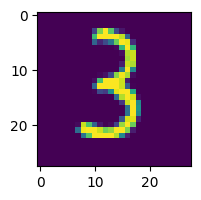

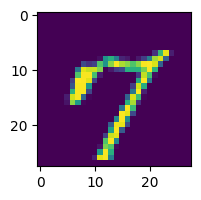

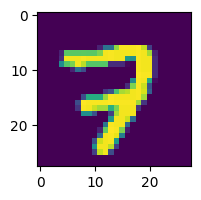

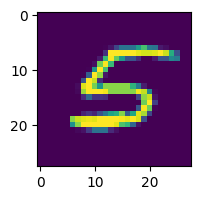

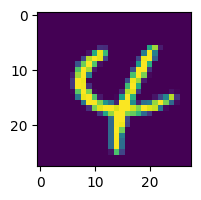

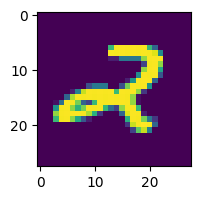

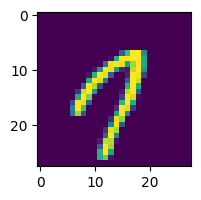

In [193]:
# Ploting the Data
##a = int(input("Enter Number of Test :"))
a=7
for i in range (a):
  n = np.random.randint(0,len(X_train))
  plt.figure(figsize=(2,2))
  plt.imshow(X_train[n])
  #plt.title(f"{Y_train[n]}")

## Standardise The Data

In [155]:
X_train_std = X_train/255
X_test_std = X_test/255

## Model Building

In [156]:
# Define the modle parameters
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50,activation= 'relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [157]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [158]:
history = model.fit(X_train_std,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8391 - loss: 0.5611 - val_accuracy: 0.9628 - val_loss: 0.1338
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9522 - loss: 0.1565 - val_accuracy: 0.9687 - val_loss: 0.1093
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9660 - loss: 0.1119 - val_accuracy: 0.9700 - val_loss: 0.1020
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9733 - loss: 0.0872 - val_accuracy: 0.9705 - val_loss: 0.1002
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9788 - loss: 0.0712 - val_accuracy: 0.9712 - val_loss: 0.1019
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9822 - loss: 0.0597 - val_accuracy: 0.9722 - val_loss: 0.1013
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9845 - loss: 0.0501 - val_accuracy: 0.9697 - val_loss: 0.1171
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9865 - loss: 0.044

## PLOTS

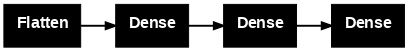

In [159]:
plot_model(model,dpi=70,rankdir="LR")

In [160]:
train_accuracy = history.history['accuracy']
train_val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
train_val_loss =history.history['val_loss']

Text(0.5, 1.0, 'Model Accuracy')

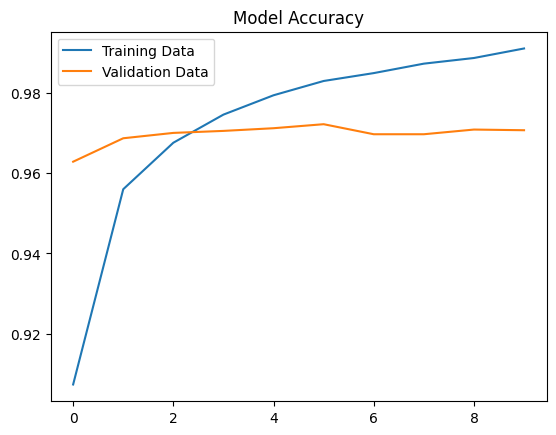

In [161]:
plt.plot(train_accuracy)
plt.plot(train_val_accuracy)
plt.legend(['Training Data','Validation Data'])
plt.title('Model Accuracy')

Text(0.5, 1.0, 'Model Loss')

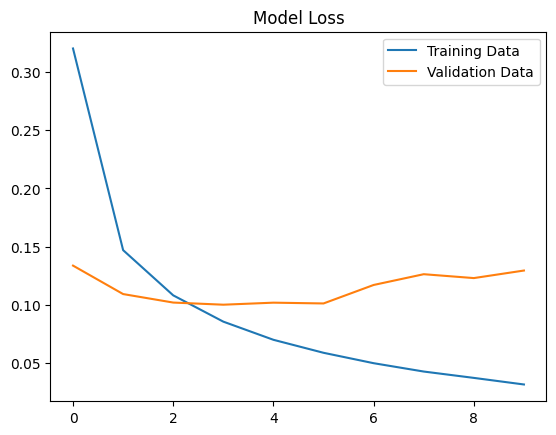

In [162]:
plt.plot(train_loss)
plt.plot(train_val_loss)
plt.legend(['Training Data','Validation Data'])
plt.title('Model Loss')

In [163]:
# Confusion Matrix
Y_pred = model.predict(X_test_std)
ylab = [np.argmax(i) for i in  Y_pred]
cm=confusion_matrix(Y_test,ylab)
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    2,    3,    1,    6,    3,    1,    4,    6],
       [   0, 1122,    0,    3,    2,    2,    3,    1,    2,    0],
       [   1,    1,  992,    8,    5,    1,    2,    6,   14,    2],
       [   0,    1,    3,  976,    0,   12,    0,    3,    9,    6],
       [   0,    0,    2,    2,  961,    2,    2,    2,    2,    9],
       [   2,    0,    0,    8,    0,  866,    1,    0,    9,    6],
       [   5,    2,    2,    1,    6,    6,  933,    0,    3,    0],
       [   0,    6,    7,    2,    1,    2,    0,  991,    4,   15],
       [   0,    0,    2,    5,    5,    4,    1,    5,  945,    7],
       [   0,    2,    1,    5,   11,    5,    1,    2,    1,  981]],
      dtype=int32)>

In [164]:
loss, accuracy = model.evaluate(X_test_std,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.1265


<Axes: >

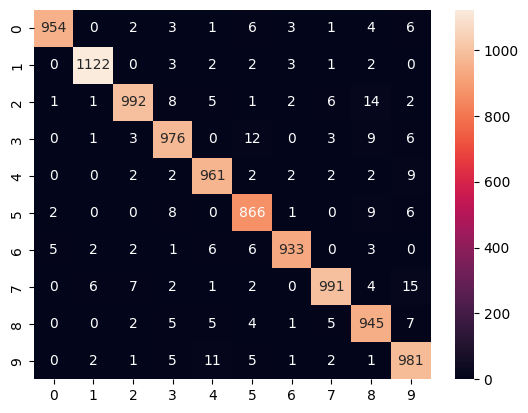

In [165]:
sns.heatmap(cm,annot=True,fmt='d')

## Predictive System

In [188]:
#path = input('Enter File Name:')

In [201]:
path = '/content/5.png'
image = c.imread(path)
image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [203]:
image = X_test[2]
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  38, 254, 109,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  87, 252,  82,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 135, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  45, 244, 150,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  84, 254,  63,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 202, 223,  11,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  32, 254, 216,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  95, 254, 195,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 140, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         57, 237, 205,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        124, 255, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        171, 254,  81,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24,
        232, 215,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 120,
        254, 159,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 151,
        254, 142,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 228,
        254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 251,
        254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 141, 254,
        205,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10, 215, 254,
        121,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 198, 176,
         10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [202]:
gray = c.cvtColor(image,c.COLOR_RGB2GRAY)
resize = c.resize(gray,(28,28))
std_resize = resize/255
reshape = np.reshape(std_resize,[1,28,28])
predict = model.predict(reshape)
lab = np.argmax(predict)
print("The Uploaded image is of ther Digit:",int(lab))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The Uploaded image is of ther Digit: 5


array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 180, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255,  58, 176, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 166,  33,  33,  33,  33,  33,  33,  33,  33,
         33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33,  33,  33,
         33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33,  33,  33,
         33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33,  33,  33,
         33,  33,  33,  33,  51,  63,  77,  82,  91,  94,  67,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33,  33,  33,
         33,  33,  95, 138, 168, 174, 174, 174, 174, 174, 137,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33,  33,  33,
         68, 159, 173, 174, 146, 124,  87,  85, 168, 168, 108,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33,  61, 162,
        152,  55,  33,  33,  33,  33,  86, 168, 170,  87,  33,  33,  33,
         32, 255],
       [255, 255, 255, 146, 166,  33,  33,  33,  33,  33,  33, 140, 165,
         67,  33,  33,  33,  36, 108, 163, 172, 145,  33,  33,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33, 124, 171,
        108,  33,  33,  78, 167, 174, 163,  76,  33,  33,  33,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33,  38, 134,
        164,  77, 124, 165, 162,  99,  40,  33,  33,  33,  33,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33,  33,  33,
        116, 169, 173, 168,  45,  33,  33,  33,  33,  33,  33,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33,  33,  33,
        148, 174, 164, 164,  33,  33,  33,  33,  33,  33,  33,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33,  33,  94,
        168, 130,  34, 150,  97,  33,  33,  33,  33,  33,  33,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33, 157, 174,
        136,  33,  33,  33, 173,  91,  33,  33,  33,  33,  33,  33,  33,
         32, 255],
       [255, 255, 251, 127, 166,  33,  33,  33,  33,  33,  33, 163, 174,
         82,  33,  33,  33, 168,  83,  33,  33,  33,  33,  33,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  83, 171, 174,
         81,  33,  67, 131, 124,  33,  33,  33,  33,  33,  33,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33, 156, 174,
        169, 158, 163, 174,  33,  33,  33,  33,  33,  33,  33,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33,  44, 104,
        113, 113, 105,  84,  33,  33,  33,  33,  33,  33,  33,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  33,  33,  33,  33,  33,  33,  33,  33,
         33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,
         32, 255],
       [255, 255, 255, 255, 255,  32,  33,  33,  33,  33,  33,  33,  33,
         33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,  33,
         31, 255],
       [255, 255, 255, 255, 255, 255, 25

In [198]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25